# CS6220 Final Project

##  <pre>                       Regression Models </pre>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

###  RED WINE

In [2]:
df=pd.read_csv('winequality-red.csv', sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
# checking for any null values 
df.isnull().any() 

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

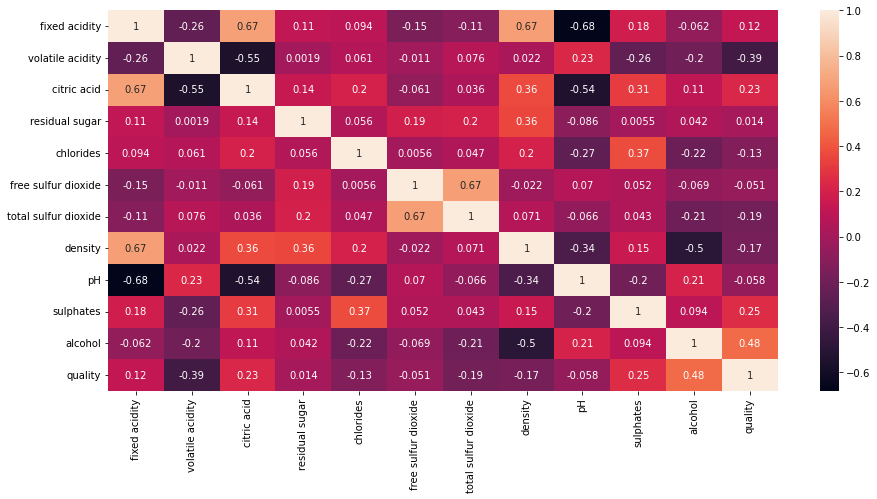

In [5]:
# correlation by visualization
plt.figure(figsize=[15,7])
# plot correlation
sb.heatmap(df.corr(),annot=True)
plt.show()

### WHITE WINE

In [6]:
df2=pd.read_csv('winequality-white.csv', sep=";")
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
df2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [8]:
# checking for any null values 
df2.isnull().any() 

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

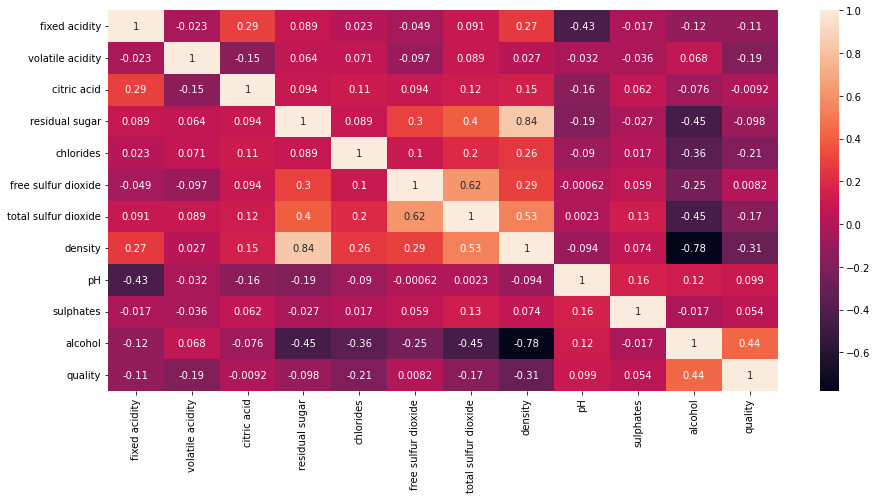

In [9]:
# correlation by visualization
plt.figure(figsize=[15,7])
# plot correlation
sb.heatmap(df2.corr(),annot=True)
plt.show()

## Linear Regresion on Red Wine 

In [10]:
X = df[list(df.columns)[:-1]]
y=df['quality']

allFeaturesMSQ = []
allFeaturesVS = []
allFeaturesRS = []

#linear regression based on all features - run 10 times
for i in range (10):
    X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
    regr=LinearRegression()
    regr.fit(X_train,y_train)
    y_test_predict=regr.predict(X_test)
    allFeaturesMSQ.append(mean_squared_error(y_test, y_test_predict))
    allFeaturesVS.append(explained_variance_score(y_test, y_test_predict))
    allFeaturesRS.append(regr.score(X_test, y_test))

msq = np.average(allFeaturesMSQ)
vs = np.average(allFeaturesVS)
rS = np.average(allFeaturesRS)
print("")
print('Mean Squared Error is {}'.format(msq))
print('Explained variance score is {}'.format(vs))
print('R-score (Accuracy) is {}'.format(rS))
print("")




Mean Squared Error is 0.425641366679219
Explained variance score is 0.34207118999253244
R-score (Accuracy) is 0.3392806780459017



Text(0.5, 1.0, 'Actual vs Predictions')

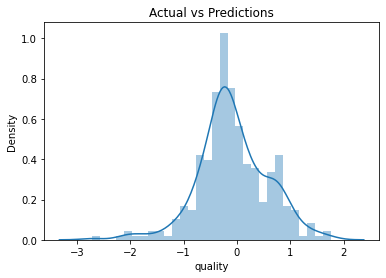

In [11]:
sb.distplot((y_test-y_test_predict),bins=30)
plt.title('Actual vs Predictions')

## Linear Regresion on White Wine 

In [12]:
X = df2[list(df.columns)[:-1]]
y=df2['quality']

allFeaturesMSQ = []
allFeaturesVS = []
allFeaturesRS = []

#linear regression based on all features - run 10 times
for i in range (10):
    X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
    regr=LinearRegression()
    regr.fit(X_train,y_train)
    y_test_predict=regr.predict(X_test)
    allFeaturesMSQ.append(mean_squared_error(y_test, y_test_predict))
    allFeaturesVS.append(explained_variance_score(y_test, y_test_predict))
    allFeaturesRS.append(regr.score(X_test, y_test))

msq = np.average(allFeaturesMSQ)
vs = np.average(allFeaturesVS)
rS = np.average(allFeaturesRS)
print("")
print('Mean Squared Error is {}'.format(msq))
print('Explained variance score is {}'.format(vs))
print('R-score (Accuracy) is {}'.format(rS))
print("")



Mean Squared Error is 0.5672380216885092
Explained variance score is 0.2686681542349599
R-score (Accuracy) is 0.267418314224503



Text(0.5, 1.0, 'Actual vs Predictions')

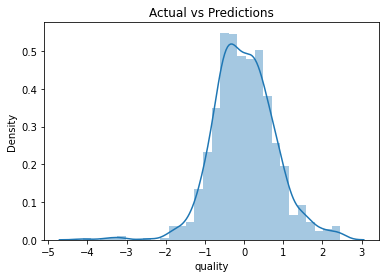

In [13]:
sb.distplot((y_test-y_test_predict),bins=30)
plt.title('Actual vs Predictions')

## Random Forest Regression on red wine

In [14]:

X = df[list(df.columns)[:-1]]
y=df['quality']
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=3)
rf.fit(X_train, y_train)
y_test_predict=rf.predict(X_test)

msq = mean_squared_error(y_test, y_test_predict)
vs = explained_variance_score(y_test, y_test_predict)
rS = rf.score(X_test, y_test)

print("")
print('Mean Squared Error is {}'.format(msq))
print('Explained variance score is {}'.format(vs))
print('R-score (Accuracy) is {}'.format(rS))
print("")




Mean Squared Error is 0.3477301645781442
Explained variance score is 0.4587800990927666
R-score (Accuracy) is 0.4490039481802123



## Random Forest Regression on white wine

In [15]:

X = df2[list(df.columns)[:-1]]
y=df2['quality']
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=3)
rf.fit(X_train, y_train)
y_test_predict=rf.predict(X_test)

msq = mean_squared_error(y_test, y_test_predict)
vs = explained_variance_score(y_test, y_test_predict)
rS = rf.score(X_test, y_test)

print("")
print('Mean Squared Error is {}'.format(msq))
print('Explained variance score is {}'.format(vs))
print('R-score (Accuracy) is {}'.format(rS))
print("")




Mean Squared Error is 0.36582714954426054
Explained variance score is 0.5263757989336832
R-score (Accuracy) is 0.5260636450157989



## Support Vector Regression on red wine

In [16]:
#Support Vector Regression
X = df[list(df.columns)[:-1]]
y=df['quality']
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
svr = SVR(gamma='auto')
svr.fit(X_train, y_train)
y_test_predict = svr.predict(X_test)
msq = mean_squared_error(y_test_predict, y_test)
vs = explained_variance_score(y_test, y_test_predict)
rS = svr.score(X_test, y_test)

print("")
print('Mean Squared Error is {}'.format(msq))
print('Explained variance score is {}'.format(vs))
print('R-score (Accuracy) is {}'.format(rS))
print("")


Mean Squared Error is 0.5526466650590294
Explained variance score is 0.2517125788790703
R-score (Accuracy) is 0.2496052708076032



## Support Vector Regression on white wine

In [17]:
X = df2[list(df.columns)[:-1]]
y=df2['quality']
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
svr = SVR(gamma='auto')
svr.fit(X_train, y_train)
y_test_predict = svr.predict(X_test)
msq = mean_squared_error(y_test_predict, y_test)
vs = explained_variance_score(y_test, y_test_predict)
rS = svr.score(X_test, y_test)

print("")
print('Mean Squared Error is {}'.format(msq))
print('Explained variance score is {}'.format(vs))
print('R-score (Accuracy) is {}'.format(rS))
print("")


Mean Squared Error is 0.5274538388527331
Explained variance score is 0.3335558815158688
R-score (Accuracy) is 0.3335096370715057



## KNN on red wine

In [18]:
X = df[list(df.columns)[:-1]]
y=df['quality']
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
scaled_f = pd.DataFrame(scaled_features, columns=X.columns)
X_train, X_test,y_train,y_test=train_test_split(scaled_f,y,test_size=0.2)


In [19]:
X_train_scaled = X_train.to_numpy()
y_train_scaled = y_train.to_numpy()

In [20]:
knn = KNeighborsRegressor(20, weights='uniform')
knn.fit(X_train,y_train)
y_test_predict = knn.predict(X_test)
msq = mean_squared_error(y_test_predict, y_test)
vs = explained_variance_score(y_test, y_test_predict)
rS = knn.score(X_test, y_test)

print("")
print('Mean Squared Error is {}'.format(msq))
print('Explained variance score is {}'.format(vs))
print('R-score (Accuracy) is {}'.format(rS))
print("")


Mean Squared Error is 0.4126953125
Explained variance score is 0.30432722107438037
R-score (Accuracy) is 0.2958544388163157



## KNN on white wine

In [21]:
X = df2[list(df.columns)[:-1]]
y=df2['quality']
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
scaled_f = pd.DataFrame(scaled_features, columns=X.columns)
X_train, X_test,y_train,y_test=train_test_split(scaled_f,y,test_size=0.2)

In [22]:
X_train_scaled = X_train.to_numpy()
y_train_scaled = y_train.to_numpy()

In [23]:
knn = KNeighborsRegressor(20, weights='uniform')
knn.fit(X_train,y_train)
y_test_predict = knn.predict(X_test)
msq = mean_squared_error(y_test_predict, y_test)
vs = explained_variance_score(y_test, y_test_predict)
rS = knn.score(X_test, y_test)

print("")
print('Mean Squared Error is {}'.format(msq))
print('Explained variance score is {}'.format(vs))
print('R-score (Accuracy) is {}'.format(rS))
print("")


Mean Squared Error is 0.4643112244897959
Explained variance score is 0.39484374490561114
R-score (Accuracy) is 0.39420992142414657

